## Introduction


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

### YoloV5


## Setup

### Configure API keys

To fine-tune YOLO5, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [1]:
!nvidia-smi

Sat Jan  4 15:53:09 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO8 via Ultralytics

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17088, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17088 (delta 22), reused 5 (delta 5), pack-reused 17051 (from 4)
Receiving objects: 100% (17088/17088), 15.71 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 45.7 MB/s eta 0:00:00


In [4]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-392-gf003c3df Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Fine-tune YOLOV5 on River Plastic Waste Dataset

In [6]:
ROBOFLOW_API_KEY = 'YOUR_API_KEY'

In [7]:
%ls

benchmarks.py    data/       LICENSE         README.zh-CN.md   tutorial.ipynb
CITATION.cff     detect.py   models/         requirements.txt  utils/
classify/        export.py   pyproject.toml  segment/          val.py
CONTRIBUTING.md  hubconf.py  README.md       train.py


In [8]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [9]:
%ls

benchmarks.py    data/       LICENSE         README.zh-CN.md   tutorial.ipynb
CITATION.cff     detect.py   models/         requirements.txt  utils/
classify/        export.py   pyproject.toml  segment/          val.py
CONTRIBUTING.md  hubconf.py  README.md       train.py


In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("project-zero").project("aerial_river_plastic_wastes")
version = project.version(10)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial_River_Plastic_Wastes-10 in yolov5pytorch:: 100%|██████████| 4938/4938 [00:00<00:00, 5658.68it/s]


In [11]:
!ls

Aerial_River_Plastic_Wastes-10	CONTRIBUTING.md  hubconf.py	 README.md	   train.py
benchmarks.py			data		 LICENSE	 README.zh-CN.md   tutorial.ipynb
CITATION.cff			detect.py	 models		 requirements.txt  utils
classify			export.py	 pyproject.toml  segment	   val.py


## Custom Training

Before training on our own custom dataset, we'll need do download some pre-trained weights so we aren't starting from scratch. This will accelerate the training process and improve the quality of our results.

**NOTE:** The results of the completed training are saved in `./yolo8/runs/segment/train/`. Let's examine them.

In [12]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 194MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 53.8MB/s]

100%|██████████| 42.4M/42.4M [00:01<00:00, 26.4MB/s]

100%|██████████| 91.9M/91.9M [00:04<00:00, 20.0MB/s]

100%|██████████| 170M/170M [00:07<00:00, 24.5MB/s]



### Changing Parameters
`--batch, --epochs, --weights`  

#### List of Weights
- yolov5n-seg.pt
- yolov5s-seg.pt
- yolov5m-seg.pt
- yolov5l-seg.pt
- yolov5x-seg.pt

## YOLO5n

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
!python segment/train.py --img 640 --batch 32 --epochs 50 --data ./Aerial_River_Plastic_Wastes-10/data.yaml --weights yolov5n-seg.pt --device 0

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      32/49      5.16G    0.05104    0.03188    0.04961   0.001698        335        640:  87% 125/143 [01:34<00:15,  1.15it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      32/49      5.16G    0.05106     0.0319    0.04962   0.001692        287        640:  88% 126/143 [01:35<00:13,  1.22it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      32/49      5.16G    0.05101    0.03185    0.04969    0.00169        314        640:  89% 127/143 [01:36<00:12,  1.32it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('

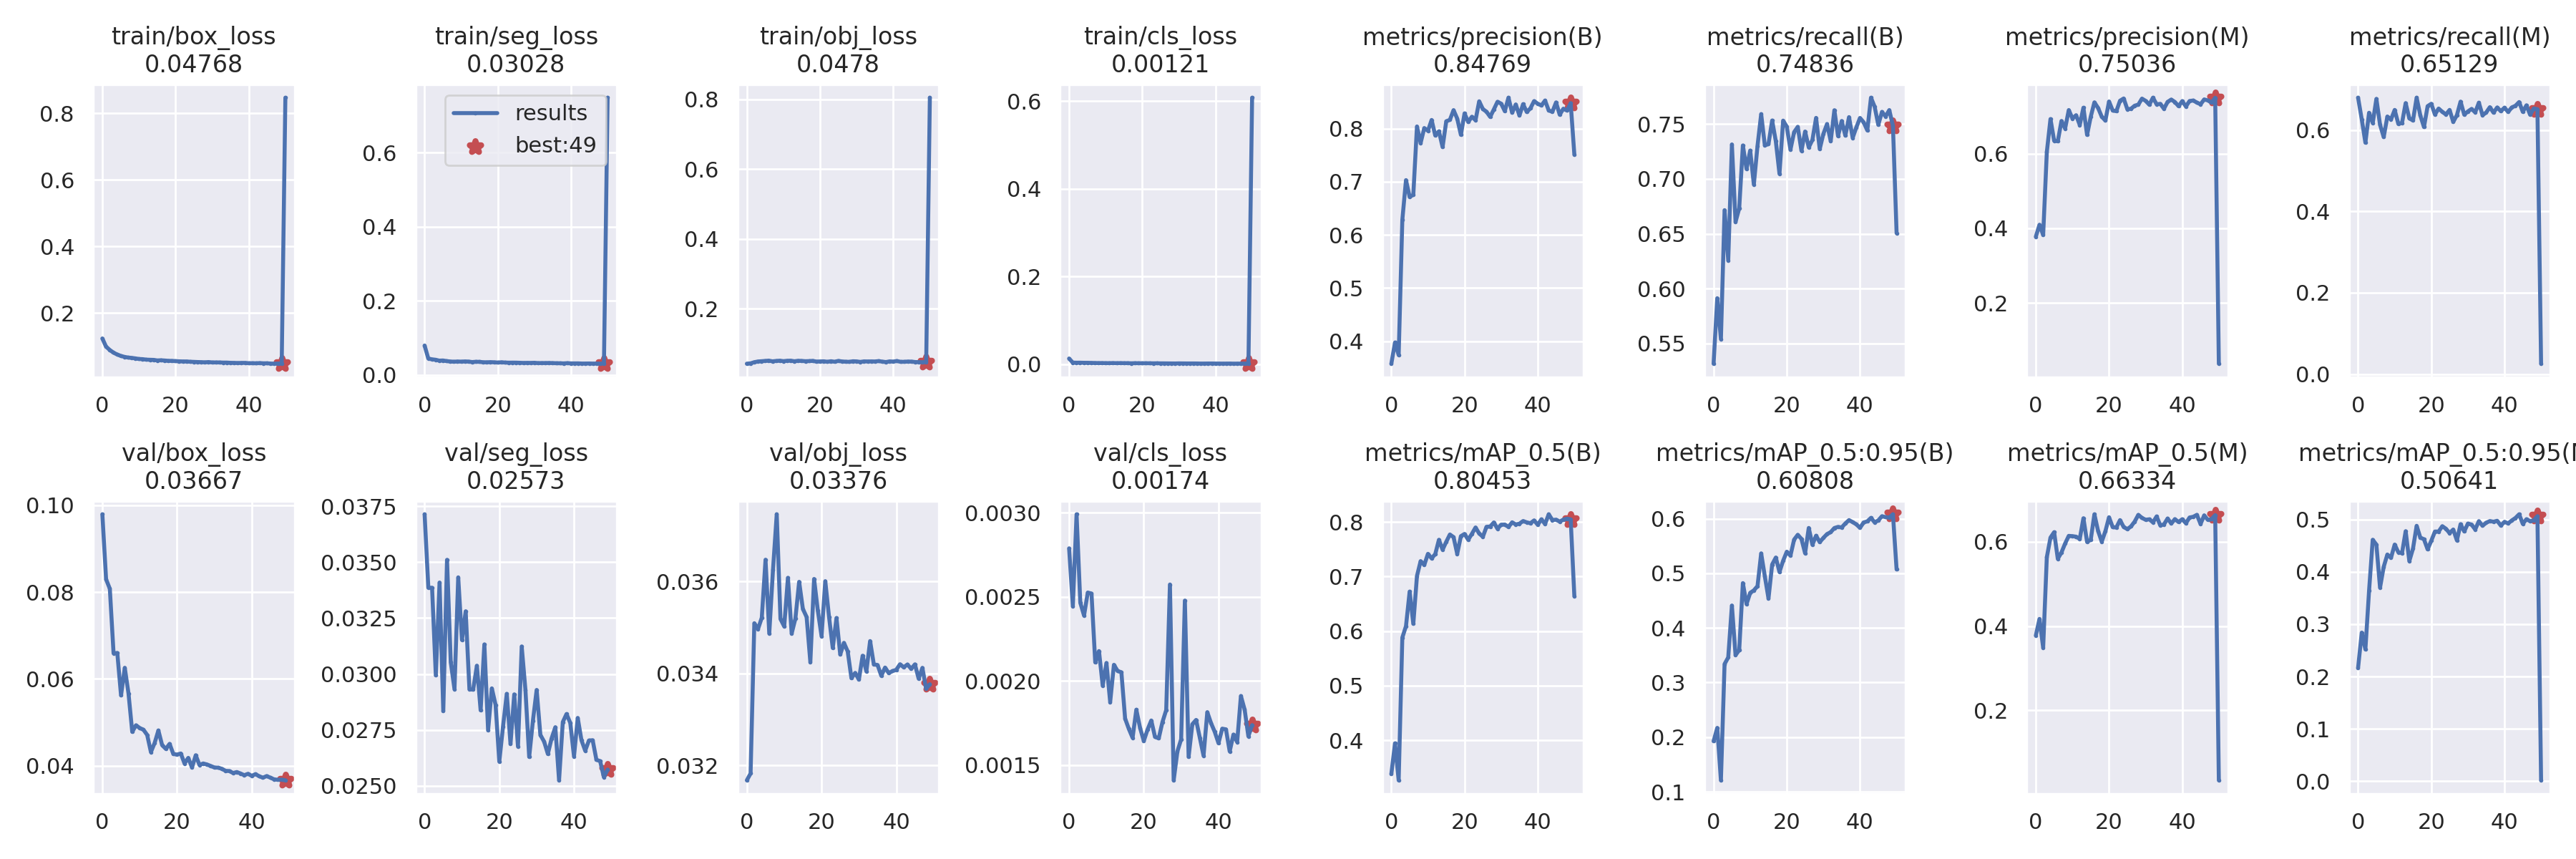

In [23]:
display.Image(filename='/content/yolov5/runs/train-seg/exp2/results.png', width=1200)

## Test and Validate the Custom Model

In [26]:
!python yolov5/segment/val.py --weights /content/yolov5/runs/train-seg/exp2/weights/best.pt --data yolov5/Aerial_River_Plastic_Wastes-10/data.yaml --img 640

segment/val: data=yolov5/Aerial_River_Plastic_Wastes-10/data.yaml, weights=['/content/yolov5/runs/train-seg/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-392-gf003c3df Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 1881103 parameters, 0 gradients, 6.7 GFLOPs
val: Scanning /content/yolov5/Aerial_River_Plastic_Wastes-10/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100% 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:16<00:00,  5.55s/it]
                   all         94       1049      0.837      0.758      0.807

## Inference with custom model
Next, we can try out inferring with our custom model. We'll pass an example image. In the notebook, note that we grab one of the images that comes in the test set folder that comes from the Roboflow data loader. This ensures that we're truly testing on an image our model did not see in training.

In [27]:
!python /content/yolov5/segment/predict.py --img 640 --weights /content/yolov5/runs/train-seg/exp2/weights/best.pt --source yolov5/Aerial_River_Plastic_Wastes-10/test/images/

segment/predict: weights=['/content/yolov5/runs/train-seg/exp2/weights/best.pt'], source=yolov5/Aerial_River_Plastic_Wastes-10/test/images/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-392-gf003c3df Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 1881103 parameters, 0 gradients, 6.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/95 /content/yolov5/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_108_jpg.rf.0cd592574b46ddf6aa2e71c6b5240fc1.jpg: 640x640 18 plastics, 1 river, 8.2ms
image 2/95 /content/yolov5/Aeri

## Downloading The results

In [31]:
%ls

1_yolo5_result.zip          datalab/  lib@     mnt/                      python-apt.tar.xz*  sys/
bin@                        dev/      lib32@   NGC-DL-CONTAINER-LICENSE  root/               tmp/
boot/                       etc/      lib64@   opt/                      run/                tools/
content/                    home/     libx32@  proc/                     sbin@               usr/
cuda-keyring_1.0-1_all.deb  kaggle/   media/   python-apt/               srv/                var/


In [41]:
import shutil

shutil.make_archive("/content/1_yolo5_result", 'zip', "/content/yolov5")

'/content/1_yolo5_result.zip'

In [ ]:
from google.colab import files

# Download the created ZIP file
files.download('/1_yolo5_result.zip')
